In [1]:
import os
import pandas as pd
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

In [2]:
data_root="/raid/elhamod/Butterflies2/Datasets/LowResolution"
suffix="preprocessed"
comimics_fileName = 'comimics.csv'
comimicstree_fileName = 'comimics_tree.csv'

In [3]:
def getComimicComponents():
    fileFullPath = os.path.join(data_root, suffix, comimics_fileName)

    # get dataframe
    df = pd.read_csv(fileFullPath) 

    #clean up
    df = df[2:]
    df.columns = df.iloc[0]
    df = df[1:]

    # make readable
    df['FullSubspecies'] = df['Species'] + ' ' + df['Subspecies']  
    df = df.drop(columns=['Species', 'Subspecies', 'Subspecies number'])
    df = df.set_index('FullSubspecies')
    df.columns = df.index.values


    # extract matrix of connectivity
    m = df.astype(int).to_numpy()
    comimics_components_lables = list(df.index.values)

    _, comimics_components = connected_components(csgraph=csr_matrix(m), directed=False, return_labels=True)

    # comimics_components = list(map(lambda x: df.index[x], comimics_components))

    print('comimics components:', comimics_components)

    return comimics_components, comimics_components_lables, df

In [4]:
comimics_components, comimics_components_lables,df = getComimicComponents()

comimics components: [ 0  1  2  3  4  2  5  6  6  7  8  9 10 11  9  3 12 13 14 15  0 16 17 15
 18  2 19 20  7  2 19  7 21 11 22 20 22 18]


In [13]:
from treelib import Node, Tree,plugins

tree = Tree()

tree.create_node("", "root")

for i in range(max(comimics_components)+1):
    comimic_representative = comimics_components_lables[comimics_components.tolist().index(i)]
    tree.create_node(comimic_representative,  comimic_representative, parent="root")

for subspecies_index, comimic_group_index  in enumerate(comimics_components):
    comimic_representative = comimics_components_lables[comimics_components.tolist().index(comimic_group_index)]
    tree.create_node(df.index.values[subspecies_index] + ' ' +str(subspecies_index),  df.index.values[subspecies_index]+str(comimic_group_index) , parent=comimic_representative)

tree.show()


├── erato amalfreda
│   └── erato amalfreda 1
├── erato amphitrite
│   └── erato amphitrite 4
├── erato colombina
│   └── erato colombina 6
├── erato cyrbia
│   ├── erato cyrbia 7
│   └── melpomene cythera 8
├── erato demophoon
│   ├── erato demophoon 9
│   ├── erato petiverana 28
│   └── melpomene rosina 31
├── erato dignus 
│   └── erato dignus  10
├── erato emma
│   └── erato emma 12
├── erato erato
│   ├── erato erato 13
│   └── melpomene thelxiopeia 33
├── erato favorinusxlativitta
│   └── erato favorinusxlativitta 16
├── erato guarica
│   └── erato guarica 18
├── erato hydara
│   ├── erato hydara 19
│   └── melpomene melpomene 23
├── erato luscombei
│   └── erato luscombei 21
├── erato microclea
│   ├── erato microclea 24
│   └── melpomene xenoclea 37
├── erato notabilis
│   ├── erato notabilis 26
│   └── melpomene plesseni 30
├── erato venus
│   ├── erato venus 34
│   └── melpomene vulcanus 36
├── melpomene aglaope
│   ├── erato lativitta 20
│   └── melpomene aglaope 0
├── melp

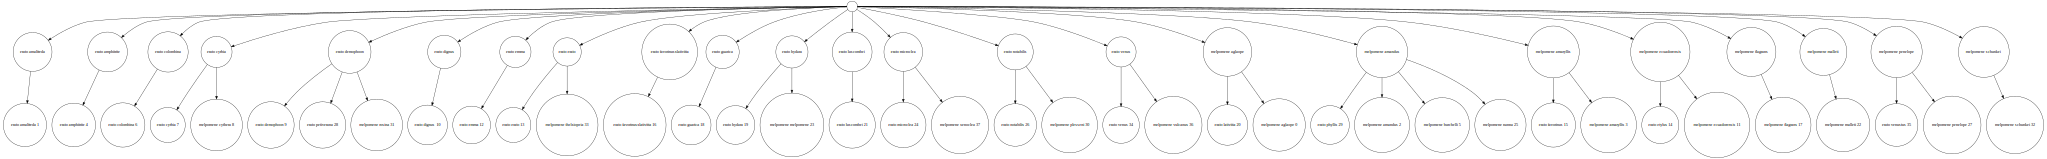

In [15]:
import graphviz
import io 
from io import StringIO

def to_graphviz(self, filename=None, shape='circle', graph='digraph'):
    """Exports the tree in the dot format of the graphviz software"""
    nodes, connections = [], []
    if self.nodes:

        for n in self.expand_tree(mode=self.WIDTH):
            nid = self[n].identifier
            state = '"{0}" [label="{1}", shape={2}]'.format(
                nid, self[n].tag, shape)
            nodes.append(state)

            for c in self.children(nid):
                cid = c.identifier
                connections.append('"{0}" -> "{1}"'.format(nid, cid))

    # write nodes and connections to dot format
    is_plain_file = filename is not None
    if is_plain_file:
        f = codecs.open(filename, 'w', 'utf-8')
    else:
        f = StringIO()

    f.write(graph + ' tree {\n')
    for n in nodes:
        f.write('\t' + n + '\n')

    if len(connections) > 0:
        f.write('\n')

    for c in connections:
        f.write('\t' + c + '\n')

    f.write('}')

    if not is_plain_file:
        k = f.getvalue()

    f.close()
    return k

k = to_graphviz(tree)
d = graphviz.Source(k)

d.view(os.path.join(data_root, suffix, comimicstree_fileName))
d #.view()

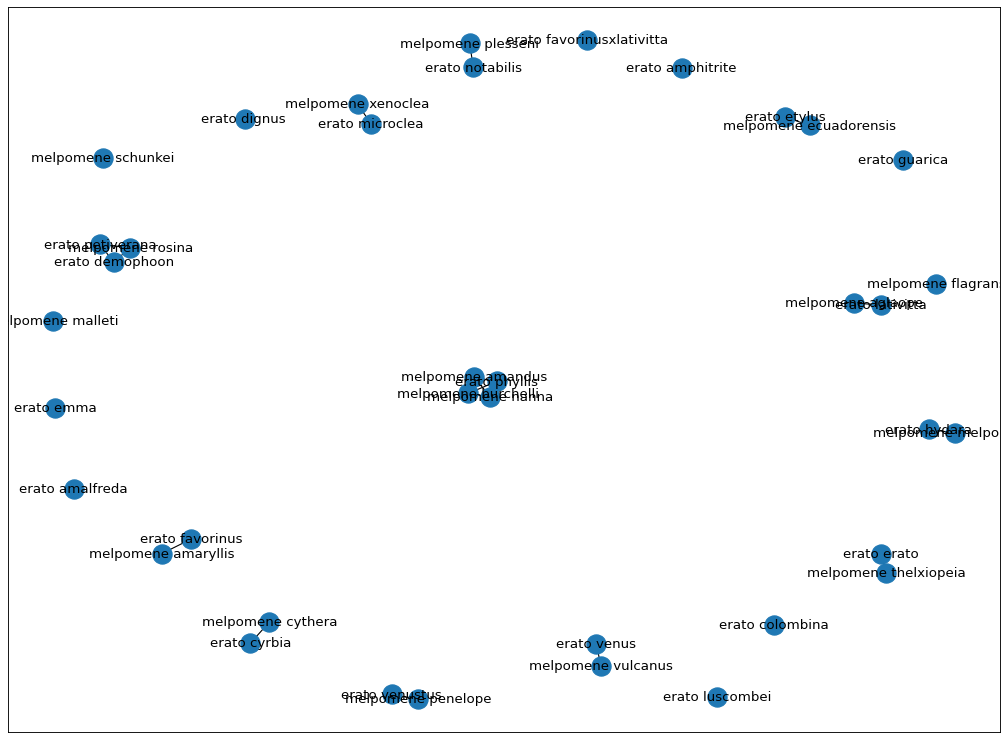

In [9]:
import networkx
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)

G = networkx.from_pandas_adjacency(df.astype(int))
G.name = "Graph from pandas adjacency matrix"
networkx.draw_networkx(G)

In [10]:
df

,melpomene aglaope,erato amalfreda,melpomene amandus,melpomene amaryllis,erato amphitrite,melpomene burchelli,erato colombina,erato cyrbia,melpomene cythera,erato demophoon,...,erato petiverana,erato phyllis,melpomene plesseni,melpomene rosina,melpomene schunkei,melpomene thelxiopeia,erato venus,erato venustus,melpomene vulcanus,melpomene xenoclea
FullSubspecies,,,,,,,,,,,,,,,,,,,,,
melpomene aglaope,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
erato amalfreda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
melpomene amandus,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
melpomene amaryllis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
erato amphitrite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
melpomene burchelli,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
erato colombina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
erato cyrbia,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
melpomene cythera,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
